# Lab 05: File I/O and Plotting

> **Instructor Note:** This lab ties together three skills: functions, file I/O, and matplotlib. Start by reminding students what they learned in the previous lab (functions, van der Waals) and preview today's goal: "By the end of this lab, you'll write data to files, read it back, and produce publication-quality plots — all in one workflow." Budget roughly: 15 min for examples, 30 min for Problems 1-2, 10 min for Problem 3, and leave Problem 4 as optional/homework.

## Examples (by instructor)

### Example 1: Ideal Gas Law Calculation with File I/O

Define a function to compute the pressure of an ideal gas using PV = nRT. The function takes n (mol), V (L), T (K), and R as arguments and returns pressure in atm. Loop over several temperatures from a list. Print the results on the screen and save them into the file "ideal_gas_results.dat". Use R = 0.082057 L·atm/(K·mol), n = 1.0 mol, and V = 10.0 L.

> **Instructor Note:** Live-code this from scratch. Key teaching moments:
> 1. **Function definition** — remind them of the syntax from last lab. Point out the docstring.
> 2. **`with open(..., 'w') as f:`** — explain that `'w'` means write (creates/overwrites the file), and `with` automatically closes the file. Ask: "What happens if you forget to close a file?" (data may not be flushed to disk).
> 3. **`f.write()` vs `print()`** — `print` goes to screen, `f.write` goes to file. Show that `f.write` does NOT add a newline automatically — you need `\n`.
> 4. **f-string formatting** — `{P:.4f}` gives 4 decimal places. Let students see the `.dat` file after running (open it in a text editor or `cat` it).

In [1]:
def ideal_gas_pressure(n, V, T, R):
    """
    Calculate pressure using the ideal gas law: P = nRT/V
    
    Parameters:
    n: amount of gas in mol
    V: volume in L
    T: temperature in K
    R: gas constant in L·atm/(K·mol)
    
    Returns:
    float: pressure in atm
    """
    P = n * R * T / V
    return P

# Constants
R = 0.082057   # L·atm/(K·mol)
n = 1.0        # mol
V = 10.0       # L

# Temperatures to test (K)
temperatures = [200, 250, 300, 350, 400, 450, 500]

# Print results to screen
print("Ideal Gas Law: P = nRT/V")
print("=" * 40)
print(f"n = {n} mol, V = {V} L")
print()
print(f"{'T (K)':<12} {'P (atm)':<12}")
print("-" * 24)

# Open file for writing
with open('ideal_gas_results.dat', 'w') as f:
    # Write header to file
    f.write("# Ideal gas law results: P = nRT/V\n")
    f.write(f"# n = {n} mol, V = {V} L, R = {R} L·atm/(K·mol)\n")
    f.write("# T (K), P (atm)\n")
    
    # Loop over temperatures
    for T in temperatures:
        # Calculate pressure
        P = ideal_gas_pressure(n, V, T, R)
        
        # Print to screen
        print(f"{T:<12} {P:<12.4f}")
        
        # Write to file
        f.write(f"{T}, {P:.4f}\n")

print()
print("Results saved to 'ideal_gas_results.dat'")

Ideal Gas Law: P = nRT/V
n = 1.0 mol, V = 10.0 L

T (K)        P (atm)     
------------------------
200          1.6411      
250          2.0514      
300          2.4617      
350          2.8720      
400          3.2823      
450          3.6926      
500          4.1029      

Results saved to 'ideal_gas_results.dat'


### Example 2: Plotting and Saving a Figure

Using the data from Example 1, create a plot of Pressure vs. Temperature. Add axis labels with units, a title, and a grid. Save the plot as a PNG file with `dpi=300`.

> **Instructor Note:** This is many students' first matplotlib plot. Walk through the anatomy:
> 1. **`plt.figure(figsize=(8, 5))`** — creates the canvas. Mention width × height in inches.
> 2. **`plt.plot(x, y, 'bo-')`** — the format string: `b`=blue, `o`=circle markers, `-`=solid line. Try removing parts live to show the effect.
> 3. **Labels and title** — reinforce the Chapter 9 checklist: "Every axis needs a label with units, no exceptions."
> 4. **`plt.savefig(..., dpi=300)`** — explain that this must come BEFORE `plt.show()`, because `show()` clears the figure. This is a common gotcha. Show the saved PNG file in the file browser.
> 5. **`plt.tight_layout()`** — prevents labels from being cut off. Tell them to always include it.

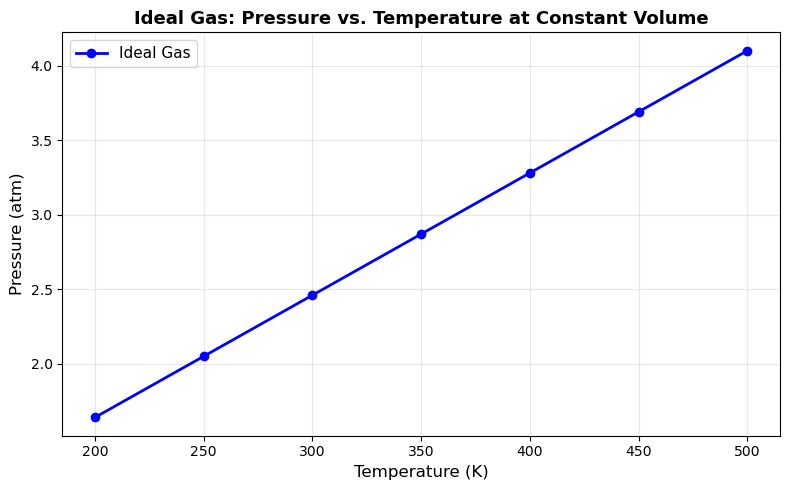

Plot saved to 'ideal_gas_PvsT.png'


In [2]:
import matplotlib.pyplot as plt

# Recalculate pressures for plotting
R = 0.082057
n = 1.0
V = 10.0
temperatures = [200, 250, 300, 350, 400, 450, 500]
pressures = [ideal_gas_pressure(n, V, T, R) for T in temperatures]

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(temperatures, pressures, 'bo-', linewidth=2, markersize=6, label='Ideal Gas')

# Labels, title, and formatting
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Pressure (atm)', fontsize=12)
plt.title('Ideal Gas: Pressure vs. Temperature at Constant Volume', fontsize=13, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the figure
plt.savefig('ideal_gas_PvsT.png', dpi=300)
plt.show()

print("Plot saved to 'ideal_gas_PvsT.png'")

---

## Practice Problems (by students)

> **Instructor Note:** From here on, students work independently. Circulate the room. The most common issues you'll see: (1) forgetting `\n` in `f.write()`, (2) unit mismatch on the van der Waals `a` parameter, (3) `savefig` after `show` producing a blank image, (4) indentation errors in nested loops (Problem 2).

### Problem 1: Van der Waals Equation with File Input

This part was done in the previous lab. Using the following van der Waals equation of states, define the Python function returning the pressure of a gas (p), given its volume (V), amount (n) and temperature (T). Use 1.0 mol of CO₂ at different temperatures from the file ("temperatures.dat") confined to a volume of 0.5 L. Use R = 0.082057 [L atm K⁻¹ mol⁻¹]. Take the van der Waals parameters a = 3.640 L² bar/mol² and b = 0.04267 L/mol.

**Van der Waals equation:**

$$
p = \frac{nRT}{V - nb} - \frac{n^2a}{V^2}
$$

**First, create the file "temperatures.dat" containing the following:**
```
# Temperature, K
50
70
120
150
200
250
```

> **Instructor Note:** Two parts here — file creation then the VdW function. For the file creation cell, point out the comment header line (`# Temperature, K`) which is good practice for self-documenting data files. For the VdW solution, the key stumbling point is **unit conversion**: `a` is given in L²·bar/mol² but R is in L·atm/(K·mol). Students must divide `a` by 1.01325 to convert bar→atm. If a student gets negative pressures at all temperatures, this is likely the issue. Also note: negative pressures at T=50K and 70K are physically correct for VdW at small volumes — the gas is in the liquid-like regime where the equation predicts unphysical negative pressures. This is a good discussion point about model limitations.

In [4]:
# Create the temperatures.dat file
with open('temperatures.dat', 'w') as f:
    f.write("# Temperature, K\n")
    f.write("50\n")
    f.write("70\n")
    f.write("120\n")
    f.write("150\n")
    f.write("200\n")
    f.write("250\n")

print("File 'temperatures.dat' created successfully")

File 'temperatures.dat' created successfully


In [5]:
# Van der Waals equation of state
def p_vdw(n, V, T, R, a, b):
    """
    Calculate pressure using the van der Waals equation.
    p = nRT/(V - nb) - n²a/V²
    """
    return (n * R * T) / (V - n * b) - (n**2 * a) / (V**2)

# Constants
R = 0.082057     # L·atm/(K·mol)
a = 3.640        # L²·bar/mol² → convert to L²·atm/mol²
a = a / 1.01325  # 1 bar = 0.986923 atm, so a (L²·atm/mol²)
b = 0.04267      # L/mol
n = 1.0          # mol
V = 0.5          # L

# Read temperatures from file
with open('temperatures.dat', 'r') as f:
    temperatures = []
    for line in f:
        line = line.strip()
        if line.startswith('#') or line == '':
            continue
        temperatures.append(float(line))

# Compute and print pressures
print("Van der Waals Pressure for CO2")
print("=" * 40)
print(f"n = {n} mol, V = {V} L")
print(f"a = {a:.4f} L²·atm/mol², b = {b} L/mol")
print()
print(f"{'T (K)':<10} {'P (atm)':<15}")
print("-" * 25)

for T in temperatures:
    P = p_vdw(n, V, T, R, a, b)
    print(f"{T:<10.0f} {P:<15.4f}")

Van der Waals Pressure for CO2
n = 1.0 mol, V = 0.5 L
a = 3.5924 L²·atm/mol², b = 0.04267 L/mol

T (K)      P (atm)        
-------------------------
50         -5.3983        
70         -1.8098        
120        7.1615         
150        12.5443        
200        21.5156        
250        30.4870        


### Problem 2: P-V Diagrams for Van der Waals Gas

Your goal is to use the above van der Waals equation of state Python function to graph p-V diagrams for the temperatures defined in the file "temperatures.dat". You will need to create one plot with P-V diagrams for all temperatures, as well as one output datafile containing p-V data for each temperature. Proceed as follows.

**a)** In addition to the math library (`import math`), import the numerical Python library called NumPy using the shortcut name np:
```python
import numpy as np
```
Also, import Matplotlib visualization library using the shortcut name plt:
```python
import matplotlib.pyplot as plt
```

**b)** Read the temperature data from the "temperatures.dat" file into a list as follows:
```python
T = np.loadtxt('temperatures.dat', comments='#', dtype='float')
```
Here, the "comments" keyword indicates to omit lines starting with "#" sign (i.e., treat them as comments), and assign the datatype of temperature values to be floats. Check that you have correctly read the values: print the whole list; print any element from the list.

**c)** To provide 1000 equidistant volume points in the range from 0.05 to 0.3, use the following command:
```python
volume = np.linspace(0.05, 0.3, 1000)
```
You will need to loop over this space of volumes using for-loop and save the results into one plot. In this plot each line will correspond to a different temperature. Thus, you will have 6 pressure lists (P1, P2, etc.) for each temperature. Start with empty lists such as `P1 = []` and then populate them using `P1.append` method. Create the p-V plot for all six temperatures from the file "temperatures.dat". Add x and y labels. Add the title "The van der Waals equation of state for CO2". Save the plot into a file using the following command:
```python
savefig('vdW_PV_diagram.png')
```
Use two different settings for figure quality: dpi=300 and dpi=50. Save two files.

**d)** Save the p-V data into six files each one for a given temperature. E.g, the file "vdW_PV_50K.dat" would correspond to 50 K. The file should begin with the following two lines:
```
# T = 50 K
# P, V
```
Use the format keyword to create such filenames.

**Hint 1:** It is recommended to implement two for-loops here, one for the temperature range and one for volume.

**Hint 2:** It is better to create a list of lists for pressures (i.e., creating a two-dimensional matrix). This way you can access elements with two indices as P[i][j].

Temperatures: [ 50.  70. 120. 150. 200. 250.]
First temperature: 50.0


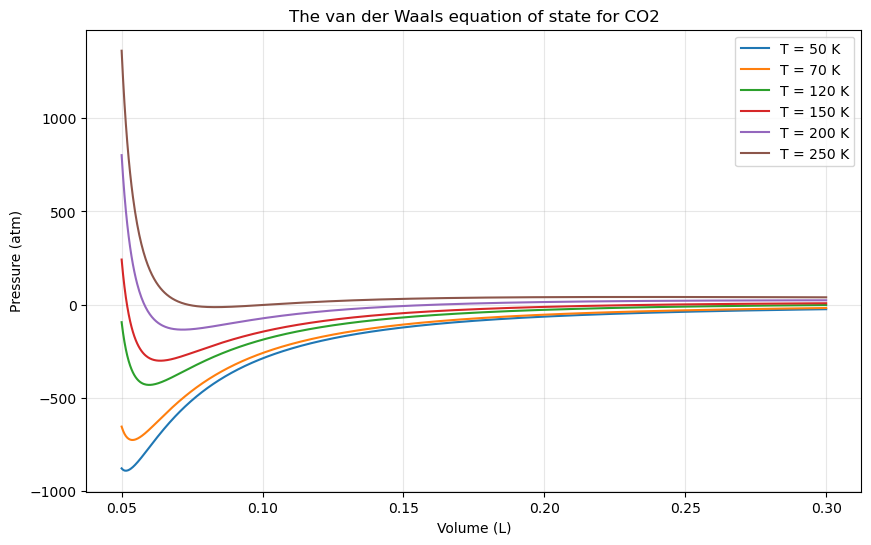

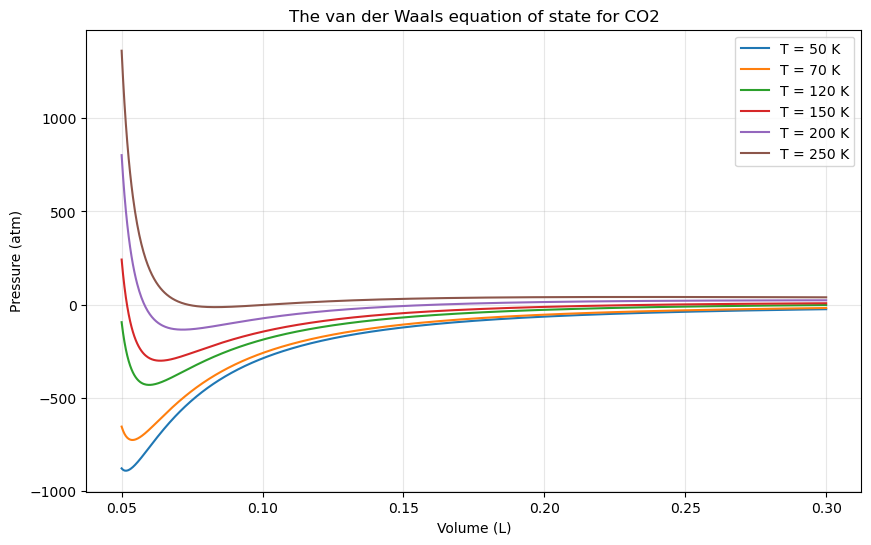

Saved vdW_PV_50.0K.dat
Saved vdW_PV_70.0K.dat
Saved vdW_PV_120.0K.dat
Saved vdW_PV_150.0K.dat
Saved vdW_PV_200.0K.dat
Saved vdW_PV_250.0K.dat


In [6]:
# Problem 2: P-V Diagrams for Van der Waals Gas

# Step a) Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Step b) Read temperature data from file
T = np.loadtxt('temperatures.dat', comments='#', dtype='float')
print("Temperatures:", T)
print("First temperature:", T[0])

# Constants (same as Problem 1)
R = 0.082057
a = 3.640 / 1.01325  # L²·bar/mol² → L²·atm/mol²
b = 0.04267
n = 1.0

# Step c) Create volume array
volume = np.linspace(0.05, 0.3, 1000)

# Initialize a list of lists for pressures (2D structure)
pressures = []

plt.figure(figsize=(10, 6))

# Outer loop: iterate over each temperature
for i, temp in enumerate(T):
    P_temp = []
    
    # Inner loop: iterate over each volume point
    for V in volume:
        p = p_vdw(n, V, temp, R, a, b)
        P_temp.append(p)
    
    pressures.append(P_temp)
    
    # Plot this temperature's P-V curve
    plt.plot(volume, P_temp, label=f'T = {temp:.0f} K')

# Add labels and title
plt.xlabel('Volume (L)')
plt.ylabel('Pressure (atm)')
plt.title('The van der Waals equation of state for CO2')
plt.legend()
plt.grid(True, alpha=0.3)

# Save the plot with high quality (dpi=300)
plt.savefig('vdW_PV_diagram.png', dpi=300)
plt.show()

# Save the plot again with low quality (dpi=50)
plt.figure(figsize=(10, 6))
for i, temp in enumerate(T):
    plt.plot(volume, pressures[i], label=f'T = {temp:.0f} K')
plt.xlabel('Volume (L)')
plt.ylabel('Pressure (atm)')
plt.title('The van der Waals equation of state for CO2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('vdW_PV_diagram_low.png', dpi=50)
plt.show()

# Step d) Save P-V data to individual files for each temperature
for i, temp in enumerate(T):
    filename = f'vdW_PV_{temp}K.dat'
    
    with open(filename, 'w') as f:
        f.write(f'# T = {temp} K\n')
        f.write('# P, V\n')
        
        for j, V in enumerate(volume):
            f.write(f'{pressures[i][j]}, {V}\n')
    
    print(f'Saved {filename}')

### Problem 3: Reading and Plotting P-V Data

Now, read the P-V data you just created from a file corresponding to 150 K temperature and plot P vs V. Save the plot into a png file. You can read the data in one go as follows:
```python
P, V = np.loadtxt('vdW_PV_150.0K.dat', comments='#', dtype='float', unpack=True)
```

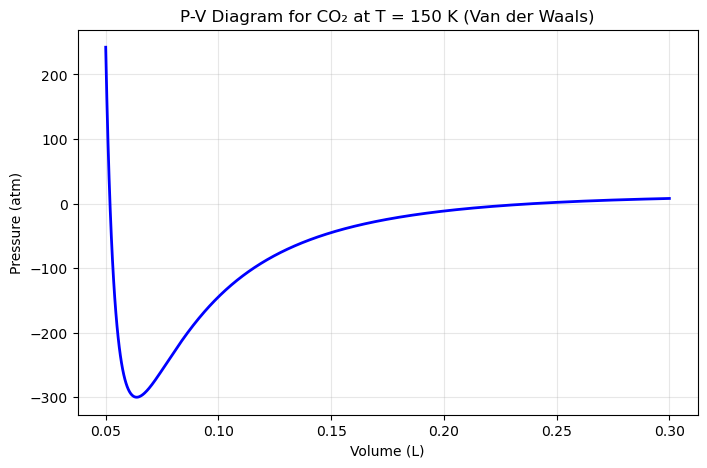

Plot saved to 'vdW_PV_150K_plot.png'


In [7]:
# Problem 3: Reading and Plotting P-V Data for 150 K
import numpy as np
import matplotlib.pyplot as plt

# Read P-V data from file
P, V = np.loadtxt('vdW_PV_150.0K.dat', comments='#', dtype='float',
                   delimiter=',', unpack=True)

# Plot P vs V
plt.figure(figsize=(8, 5))
plt.plot(V, P, 'b-', linewidth=2)
plt.xlabel('Volume (L)')
plt.ylabel('Pressure (atm)')
plt.title('P-V Diagram for CO₂ at T = 150 K (Van der Waals)')
plt.grid(True, alpha=0.3)
plt.savefig('vdW_PV_150K_plot.png', dpi=300)
plt.show()

print("Plot saved to 'vdW_PV_150K_plot.png'")

### Problem 4: Lennard-Jones Potential for Argon

Implement the function to compute the Lennard-Jones interatomic potential for argon:

$$
V(r) = 4\varepsilon\left[\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6\right]
$$

where r is the interatomic distance, ε = 3.4 kJ/mol is the depth of the potential well and σ = 3.4 Angstroms is the separation distance at which the potential is zero. 

Plot V(r) at a grid of r values, e.g., using `np.linspace(3.5, 10, 1000)` similar to Problem 2c). Add the titles for the figure and the axes. Set appropriate plot limits. Save V-r values into the external file like Problem 2d).

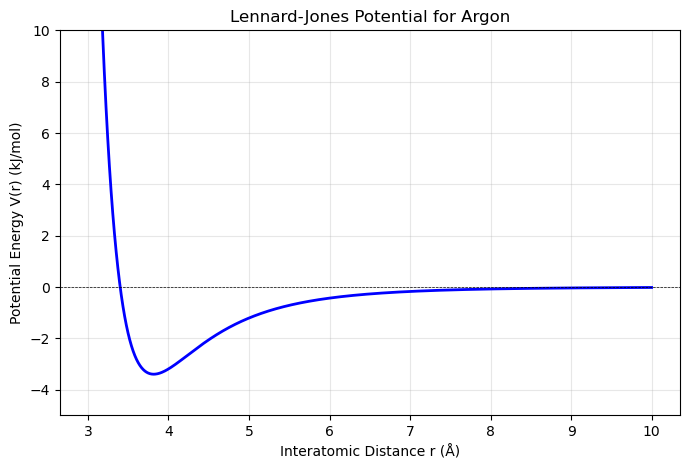

Data saved to 'LJ_potential_Ar.dat'


In [8]:
# Problem 4 (Bonus): Lennard-Jones Potential for Argon
import numpy as np
import matplotlib.pyplot as plt

def lennard_jones(r, epsilon, sigma):
    """
    Compute the Lennard-Jones potential.
    V(r) = 4ε[(σ/r)¹² - (σ/r)⁶]
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Lennard-Jones parameters for Argon
epsilon = 3.4    # kJ/mol (depth of potential well)
sigma = 3.4      # Angstroms (distance where V = 0)

# Grid of interatomic distances
r = np.linspace(3.0, 10, 1000)

# Compute potential
V = lennard_jones(r, epsilon, sigma)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(r, V, 'b-', linewidth=2)
plt.axhline(y=0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('Interatomic Distance r (Å)')
plt.ylabel('Potential Energy V(r) (kJ/mol)')
plt.title('Lennard-Jones Potential for Argon')
plt.ylim(-5, 10)
plt.grid(True, alpha=0.3)
plt.savefig('LJ_potential_Ar.png', dpi=300)
plt.show()

# Save V-r data to file
with open('LJ_potential_Ar.dat', 'w') as f:
    f.write('# Lennard-Jones Potential for Argon\n')
    f.write(f'# epsilon = {epsilon} kJ/mol, sigma = {sigma} Angstroms\n')
    f.write('# r (Angstroms), V (kJ/mol)\n')
    for ri, Vi in zip(r, V):
        f.write(f'{ri:.6f}, {Vi:.6f}\n')

print("Data saved to 'LJ_potential_Ar.dat'")